In [1]:
import lhapdf
#import ROOT
import math
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq18 = lhapdf.mkPDF("CT18qed",0)
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)
#JAM21_PDF = lhapdf.mkPDF("JAM21PionPDFnlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/CT18qed/CT18qed_0000.dat
CT18qed PDF set, member #0, version 1
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


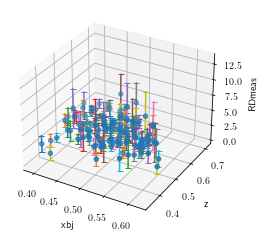

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
with open('yield_ratio_Q2xzRunG_combined.json') as j_RD:
    RDxz = json.load(j_RD)
#with open('yield_ratio_Q2xzRunG_combined.json') as j_RD:
    #RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []
for key_xbj,xbj_value in RDxz["5.500000"].items():
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        
        z_hadron = float(key_z)
        
        for key_RunG,RunG_value in z_value.items():
            RD=float(RunG_value["value"])
            RD_error = float(RunG_value["error"])
            RDs.append(float(RunG_value["value"]))
            RDs_error.append(float(RunG_value["error"]))
            xbj_corr = float(RunG_value["xbj_corr"])
            z_corr = float(RunG_value["z_corr"])
            xs.append(xbj_corr)
            zs.append(z_corr)
            ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
plt.show()
#plt.savefig("RD_xbj_z")

4.0


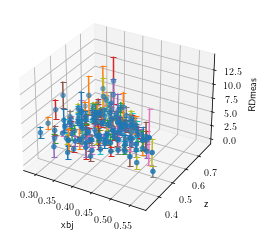

4.75


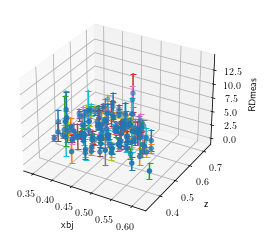

5.5


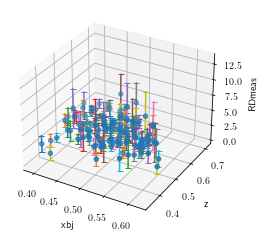

In [3]:
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    #with open('yield_ratio_Q2xzRunG_combined.json') as j_RD:
    #    RDxz = json.load(j_RD)

    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    print(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
        
            z_hadron = float(key_z)
        
            for key_RunG,RunG_value in z_value.items():
                RD=float(RunG_value["value"])
                RD_error = float(RunG_value["error"])
                RDs.append(float(RunG_value["value"]))
                RDs_error.append(float(RunG_value["error"]))
                xbj_corr = float(RunG_value["xbj_corr"])
                z_corr = float(RunG_value["z_corr"])
                xs.append(xbj_corr)
                zs.append(z_corr)
                ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("xbj")
    ax.set_ylabel("z")
    ax.set_zlabel("RDmeas")
    plt.show()
    #plt.savefig("RD_xbj_z_"+str(Q2)+".png")

In [4]:
#CSVS_results = []
pdf_sets = []
i_FF = 2
FF_model = ["fDSSLO","fDSSNLO","JAM20","hknsff07_LO","hknsff07_NLO"]
i_PDF = 1
PDF_model = ["cteq6l1","JAM20","cteq18qed"]

In [37]:
#inits=(0,0)
#three input
#inits = (1,-1,1)
inits = (0.31621375387783907,0.9655536623222454,2.2,1.4)
#inits = (0.31621375387783907,0.9655536623222454,4,0.2)
#inits = (0.31621375387783907,0.9655536623222454,1.8,-0.2)
#inits = (0.31621375387783907,1.0602531294347466,0.60029420012617,0.5690151479308769)
#four input
#4
#inits=(0.5837438039662431,-1.1844700435399933,1.6742194710533476,0)
#4.75
#inits=(0.5487693365000776,-1.0881946339773718,1.594995464377801,0)
#5.5
#inits=(0.38322380904636766,-0.47844410509432217,1.115729075281362,0)



No handles with labels found to put in legend.


0.36896267968365476 1.1479208623928667 1.9338043646024174 1.106627275858631
['$\\chi^2$ / $n_\\mathrm{dof}$ = 280.7 / 185']


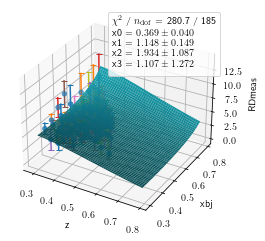

In [38]:
from iminuit import Minuit
import scipy.integrate as integrate
import scipy.special as sc
import sys
sys.path.insert(1,'DSS')
import fDSS_
sys.path.insert(1,'hkns07fflib-v1_2')
import hknsff07_
def Dz_param(z_had,params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return (1-delta_z)/(1+delta_z)
    #return params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
def CSVx_param(xbj,params):
    #a = params[3]
    a = -0.5
    b = params[2]
    c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
    CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
    #return params[len(params)-1]
def Bxz_param(Q,z_had,xbj,i_pdf,i_ff):
    duplus = 0
    duminus = 0
    dsplus = 0
    dsminus = 0
    delta_z = 0
    if i_ff==2:
        duplus = JAM20.xfxQ(2,z_had,Q)
        duminus = JAM20.xfxQ(-2,z_had,Q)
        dsplus = JAM20.xfxQ(3,z_had,Q)
        dsminus = JAM20.xfxQ(-3,z_had,Q)
        delta_z = duminus/duplus
        
    elif i_ff==0:
        duplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus
    elif i_ff==1:
        duplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus
        #return (1-delta_z)/(1+delta_z)
    elif i_ff==3:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    elif i_ff==4:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    ubar = 0
    dbar = 0
    uv = 0
    dv = 0
    strange = 0
    sbar = 0
    if i_pdf == 0:
        ubar = p_cteq6.xfxQ(-2,xbj,Q)
        dbar = p_cteq6.xfxQ(-1,xbj,Q)
        uv = p_cteq6.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq6.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq6.xfxQ(3,xbj,Q)
        sbar = p_cteq6.xfxQ(-3,xbj,Q)
    elif i_pdf == 1:
        ubar = JAM20_PDF.xfxQ(-2,xbj,Q)
        dbar = JAM20_PDF.xfxQ(-1,xbj,Q)
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-ubar
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-dbar
        strange = JAM20_PDF.xfxQ(3,xbj,Q)
        sbar = JAM20_PDF.xfxQ(-3,xbj,Q)
    elif i_pdf == 2:
        ubar = p_cteq18.xfxQ(-2,xbj,Q)
        dbar = p_cteq18.xfxQ(-1,xbj,Q)
        uv = p_cteq18.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq18.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq18.xfxQ(3,xbj,Q)
        sbar = p_cteq18.xfxQ(-3,xbj,Q)
    B_NS = 5*(ubar+dbar)/(uv+dv)
    B_sz = (dsplus+dsminus)/duplus/(1+delta_z) 
    B_S = B_sz*(strange+sbar)/(uv+dv)
    return 5/2+B_NS+B_S
def Ax_param(Q,xbj,i_pdf):
    uv = 0
    dv = 0
    if i_pdf == 0:
        uv = p_cteq6.xfxQ(2,xbj,Q)-p_cteq6.xfxQ(-2,xbj,Q)
        dv = p_cteq6.xfxQ(1,xbj,Q)-p_cteq6.xfxQ(-1,xbj,Q)
    elif i_pdf == 1:
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-JAM20_PDF.xfxQ(-2,xbj,Q)
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-JAM20_PDF.xfxQ(-1,xbj,Q)
    elif i_pdf ==2:
        uv = p_cteq18.xfxQ(2,xbj,Q)-p_cteq18.xfxQ(-2,xbj,Q)
        dv = p_cteq18.xfxQ(1,xbj,Q)-p_cteq18.xfxQ(-1,xbj,Q)
    return -4/(3*(uv+dv))
def RDmeas_CSV(Q,z_had,xbj,params,i_pdf,i_ff):
    #delta_z = a+b*z_had
    #delta_z = a+b*z_had/(1+z_had)
    #delta_z = z_had**a*(1-z_had)**b
    #delta_z = z_had**a*(1+z_had)**b
    #delta_z = a
    #Dz = (1-delta_z)/(1+delta_z)
    #Dz = a+b*z_had/(1+z_had)
    Dz = Dz_param(z_had,params)
    CSVx = CSVx_param(xbj,params)
    #Dz = params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
    #CSVx = 2*params[3]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[3]
    #CSVx = params[len(params)-1]
    #CSVx = (1-xbj)**params[4]*xbj**params[5]
    Bx = Bxz_param(Q,z_had,xbj,i_pdf,i_ff)
    Ax = Ax_param(Q,xbj,i_pdf)
    return (Bx-Ax*CSVx)/Dz-2.5
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#with open('yield_ratio_xz_combined_weighted.json') as j_RD:
#    RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []

for key_xbj,xbj_value in RDxz["4.000000"].items():
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        
        z_hadron = float(key_z)
        
        for key_RunG,RunG_value in z_value.items():
            RD=float(RunG_value["value"])
            RD_error = float(RunG_value["error"])
            RDs.append(float(RunG_value["value"]))
            RDs_error.append(float(RunG_value["error"]))
            xbj_corr = float(RunG_value["xbj_corr"])
            z_corr = float(RunG_value["z_corr"])
            xs.append(xbj_corr)
            zs.append(z_corr)
            ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("z")
ax.set_ylabel("xbj")
ax.set_zlabel("RDmeas")
def least_squares_Q2(params):
    least_square = 0
    for key_xbj,xbj_value in RDxz["4.000000"].items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
        
            z_hadron = float(key_z)
        
            for key_RunG,RunG_value in z_value.items():
                RD=float(RunG_value["value"])
                RD_error = float(RunG_value["error"])
                RDs.append(float(RunG_value["value"]))
                RDs_error.append(float(RunG_value["error"]))
                xbj_corr = float(RunG_value["xbj_corr"])
                z_corr = float(RunG_value["z_corr"])
                
                Q2_corr = float(RunG_value["Q2_corr"])
                Q = math.sqrt(Q2_corr)
                
                least_square += (RD-RDmeas_CSV(Q,z_hadron,xbj,params,i_PDF,i_FF)) ** 2 / RD_error**2
    return least_square
m_Q2 = Minuit(least_squares_Q2,inits)
m_Q2.errordef = Minuit.LEAST_SQUARES
#m_Q2 = Minuit(least_squares_Q2,a = init[0],b = init[1],c = init[2],d = init[3])
#m_Q2 = Minuit(least_squares_Q2,a = 0.7,b = -0.61,c = 0,d = 0)
#m_Q2 = Minuit(least_squares_Q2,0.73,-0.61,0.1,0.1,error_a = 0.05,error_b = 0.05,errordef=1)
m_Q2.migrad()
m_Q2.hesse()
print(*m_Q2.values)
#print(m_Q2.values["a"])



x = np.arange(0.3,0.8,0.01)
y = np.arange(0.3,0.8,0.01)
#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in x:
    fit_RDmeas_zi = []
    for zi in y:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(2,zi,xbj,m_Q2.values,i_PDF,i_FF))
X,Y = np.meshgrid(x,y)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z)
#ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
#plt.plot(zs,fit_RDmeas,label = "fit")
#print(xs) 
#print(zs)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(zs) - m_Q2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()



No handles with labels found to put in legend.


0.36896267968365476 1.1479208623928667 1.9338043646024174 1.106627275858631
['$\\chi^2$ / $n_\\mathrm{dof}$ = 280.7 / 185']


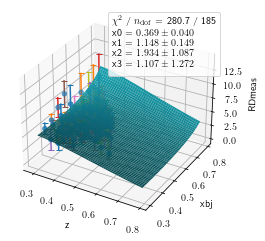

No handles with labels found to put in legend.


0.3688694949352112 1.2148168184881456 2.294329459905248 1.4983371209169287
['$\\chi^2$ / $n_\\mathrm{dof}$ = 225.9 / 169']


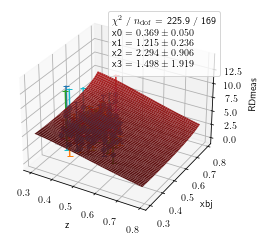

No handles with labels found to put in legend.


0.3154970706906718 1.9011832024529791 2.4878701314558813 3.646233542301499
['$\\chi^2$ / $n_\\mathrm{dof}$ = 204.8 / 136']


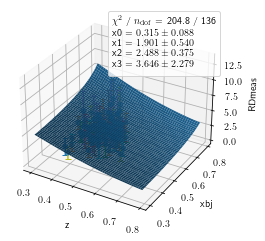

In [39]:
Qs = []
parameters = []
param_errs = []
kaisquare = []
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
   
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    Qs.append(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
        
            z_hadron = float(key_z)
            
            for key_RunG,RunG_value in z_value.items():
                RD=float(RunG_value["value"])
                RD_error = float(RunG_value["error"])
                RDs.append(float(RunG_value["value"]))
                RDs_error.append(float(RunG_value["error"]))
                xbj_corr = float(RunG_value["xbj_corr"])
                z_corr = float(RunG_value["z_corr"])
                xs.append(xbj_corr)
                zs.append(z_corr)
                ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("z")
    ax.set_ylabel("xbj")
    ax.set_zlabel("RDmeas")
    def least_squares_Q2(params):
        least_square = 0
        for key_xbj,xbj_value in Q2_value.items():
            xbj = float(key_xbj) 
            for key_z,z_value in xbj_value.items():
        
                z_hadron = float(key_z)
        
                for key_RunG,RunG_value in z_value.items():
                    RD=float(RunG_value["value"])
                    RD_error = float(RunG_value["error"])
                    RDs.append(float(RunG_value["value"]))
                    RDs_error.append(float(RunG_value["error"]))
                    xbj_corr = float(RunG_value["xbj_corr"])
                    z_corr = float(RunG_value["z_corr"])
                
                    Q2_corr = float(RunG_value["Q2_corr"])
                    Q = math.sqrt(Q2_corr)
                
                    least_square += (RD-RDmeas_CSV(Q,z_hadron,xbj,params,i_PDF,i_FF)) ** 2 / RD_error**2
        return least_square
    m_Q2 = Minuit(least_squares_Q2,inits)
    m_Q2.errordef = Minuit.LEAST_SQUARES
    #m_Q2 = Minuit(least_squares_Q2,a = init[0],b = init[1],c = init[2],d = init[3])
    #m_Q2 = Minuit(least_squares_Q2,a = 0.7,b = -0.61,c = 0,d = 0)
    #m_Q2 = Minuit(least_squares_Q2,0.73,-0.61,0.1,0.1,error_a = 0.05,error_b = 0.05,errordef=1)
    m_Q2.migrad()
    m_Q2.hesse()
    print(*m_Q2.values)
    #print(m_Q2.values["a"])
    parameters.append(m_Q2.values)
    param_errs.append(m_Q2.errors)
    #print(m_Q2.values["a"])
    
    kaisquare.append(m_Q2.fval)


    x = np.arange(0.3,0.8,0.01)
    y = np.arange(0.3,0.8,0.01)
    #x = np.array(xs)
    #y = np.array(zs)
    fit_RDmeas=[]
    for xbj in x:
        fit_RDmeas_zi = []
        for zi in y:
            #fit_RDmeas_zi.append()
            fit_RDmeas.append(RDmeas_CSV(2,zi,xbj,m_Q2.values,i_PDF,i_FF))
    X,Y = np.meshgrid(x,y)
    Z = np.reshape(fit_RDmeas,X.shape)
    
    ax.plot_surface(X,Y,Z)
    #ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
    #plt.plot(zs,fit_RDmeas,label = "fit")
    #print(xs) 
    #print(zs)
    fit_info = [
        f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(zs) - m_Q2.nfit}",
    ]
    print(fit_info)
    for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
        fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    plt.legend(title="\n".join(fit_info))

     
    plt.show()




4.0
0


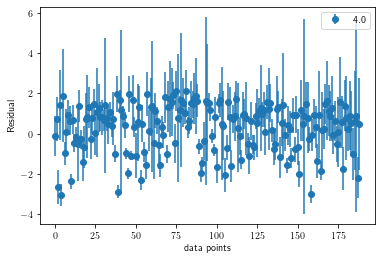

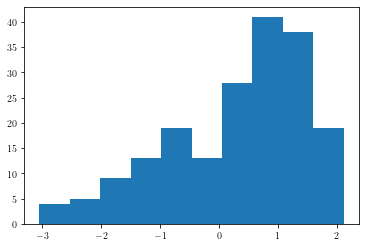

4.75
1


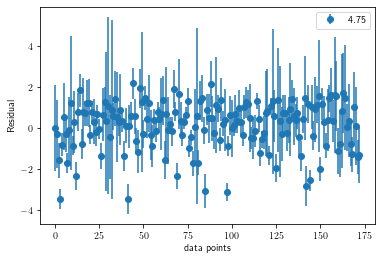

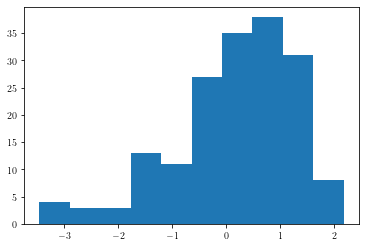

5.5
2


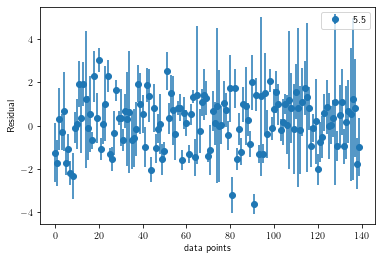

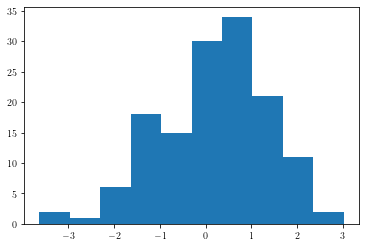

In [40]:
i_Q2 = 0
#Residual_iminuit = []
#Residual_error_iminuit = []
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    #Qs.append(Q2)
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    print(i_Q2)
    params = parameters[i_Q2]
    
    for key_xbj,xbj_value in Q2_value.items():
            xbj = float(key_xbj) 
            for key_z,z_value in xbj_value.items():
        
                z_hadron = float(key_z)
        
                for key_RunG,RunG_value in z_value.items():
                    RD=float(RunG_value["value"])
                    RD_error = float(RunG_value["error"])
                    RDs.append(float(RunG_value["value"]))
                    RDs_error.append(float(RunG_value["error"]))
                    xbj_corr = float(RunG_value["xbj_corr"])
                    z_corr = float(RunG_value["z_corr"])
                
                    Q2_corr = float(RunG_value["Q2_corr"])
                    Q = math.sqrt(Q2_corr)
            
                    Residual_error.append(RD_error)
            
                    RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,xbj,params,i_PDF,i_FF)
                    Residual.append((RD-RDmeas_CSV_fit)/RD_error)
                    Residual_count.append(i_count)
                    #Residual_iminuit[i_Q2].append(Residual)
                    i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(Residual_count,Residual,Residual_error,fmt='o',label = Q2)
    plt.xlabel("data points")
    plt.ylabel("Residual")
    plt.legend()
    
    i_Q2+=1
    
    
    fig,ax = plt.subplots()
    #n,bins,patches = ax.hist(Residual,50,density = True)
    #ax.plot(bins,Residual)
    plt.hist(Residual,10)
    plt.show()

4.0
4.75
5.5


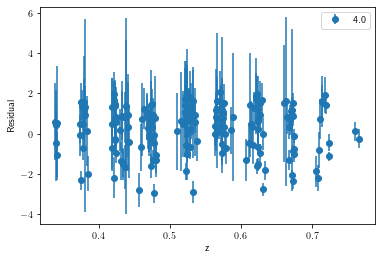

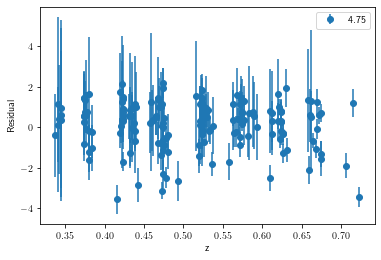

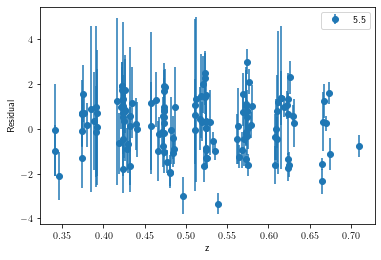

In [41]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    #Qs.append(Q2)
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    params = parameters[i_Q2]
    
    for key_xbj,xbj_value in Q2_value.items():
       
        for key_z,z_value in xbj_value.items():
            
            for key_RunG,RunG_value in z_value.items():
                    RD=float(RunG_value["value"])
                    RD_error = float(RunG_value["error"])
                    RDs.append(float(RunG_value["value"]))
                    RDs_error.append(float(RunG_value["error"]))
                    xbj_corr = float(RunG_value["xbj_corr"])
                    z_corr = float(RunG_value["z_corr"])
                    xbj = xbj_corr
                    z_hadron = z_corr
                    xs.append(xbj)
                    zs.append(z_hadron)
                    Q2_corr = float(RunG_value["Q2_corr"])
                    Q = math.sqrt(Q2_corr)
            
                    Residual_error.append(RD_error)
            
                    RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,xbj,params,i_PDF,i_FF)
                    Residual.append((RD-RDmeas_CSV_fit)/RD_error)
                    Residual_count.append(i_count)
                    #Residual_iminuit[i_Q2].append(Residual)
                    i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(zs,Residual,Residual_error,fmt='o',label = Q2)
    plt.xlabel("z")
    plt.ylabel("Residual")
    plt.legend()
    
    i_Q2+=1

4.0
4.75
5.5


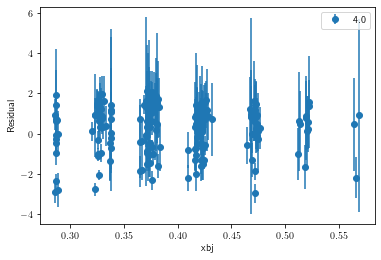

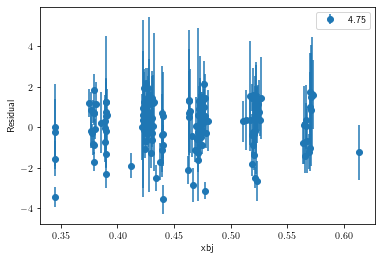

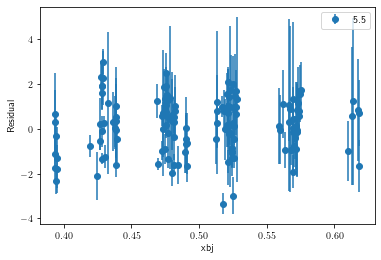

In [42]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    #Qs.append(Q2)
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    params = parameters[i_Q2]
    
    for key_xbj,xbj_value in Q2_value.items():
       
        for key_z,z_value in xbj_value.items():
            
            for key_RunG,RunG_value in z_value.items():
                    RD=float(RunG_value["value"])
                    RD_error = float(RunG_value["error"])
                    RDs.append(float(RunG_value["value"]))
                    RDs_error.append(float(RunG_value["error"]))
                    xbj_corr = float(RunG_value["xbj_corr"])
                    z_corr = float(RunG_value["z_corr"])
                    xbj = xbj_corr
                    z_hadron = z_corr
                    xs.append(xbj)
                    zs.append(z_hadron)
                    Q2_corr = float(RunG_value["Q2_corr"])
                    Q = math.sqrt(Q2_corr)
            
                    Residual_error.append(RD_error)
            
                    RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,xbj,params,i_PDF,i_FF)
                    Residual.append((RD-RDmeas_CSV_fit)/RD_error)
                    Residual_count.append(i_count)
                    #Residual_iminuit[i_Q2].append(Residual)
                    i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(xs,Residual,Residual_error,fmt='o',label = Q2)
    plt.xlabel("xbj")
    plt.ylabel("Residual")
    plt.legend()
    
    i_Q2+=1

In [43]:
print(len(Qs))
print("Q2   parameters")

for i in range(len(Qs)):
    print(Qs[i],end = '')
    print(" ",end = '')
    print(*parameters[i])
    #print(f"{parameter_a[i]:.5f}"," ",f"{parameter_b[i]:.5f}"," ",f"{parameter_c[i]:.5f}"," ",f"{parameter_d[i]:.5f}"," ",f"{kaisquare[i]:.5f}")
    print(Qs[i],end = '')
    print(" ",end = '')
    print(*param_errs[i])
    #print(f"{err_a[i]:.5f}"," ",f"{err_b[i]:.5f}"," ",f"{err_c[i]:.5f}"," ",f"{err_d[i]:.5f}"," ",f"{kaisquare[i]:.5f}")

3
Q2   parameters
4.0 0.36896267968365476 1.1479208623928667 1.9338043646024174 1.106627275858631
4.0 0.040368970870609255 0.14919788562773273 1.0868226514340542 1.2724787565238604
4.75 0.3688694949352112 1.2148168184881456 2.294329459905248 1.4983371209169287
4.75 0.05046491698194005 0.23635501062591568 0.9062255469685618 1.9187950211169544
5.5 0.3154970706906718 1.9011832024529791 2.4878701314558813 3.646233542301499
5.5 0.08825011449724779 0.5397685846796808 0.37456187608063685 2.278574359669172


In [44]:
print(PDF_model[i_PDF],"&",end = ' ')
print(FF_model[i_FF],"&",end = ' ')
for i in range(len(Qs)):
    
    print(f"{parameters[i][2]:.5f} &",end = ' ')
    print(f"{param_errs[i][2]:.5f} &",end = ' ')


JAM20 & JAM20 & 1.93380 & 1.08682 & 2.29433 & 0.90623 & 2.48787 & 0.37456 & 

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


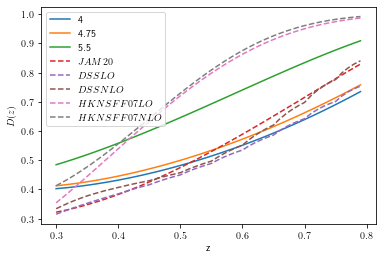

In [45]:
#this one should change with change of fitting func
#def Dz(z_had, params):
#    return params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
#parameters_scipy = [ 3.14617947e-01,  1.03733758e+00,  1.66666667e-01, -8.61444127e-12]
z_had = np.arange(0.3,0.8,0.01)
#plt.plot(z_had,Dz(z_had,inits))
plt.plot(z_had,Dz_param(z_had,parameters[0]),label = '4')
plt.plot(z_had,Dz_param(z_had,parameters[1]),label = '4.75')
plt.plot(z_had,Dz_param(z_had,parameters[2]),label = '5.5')
#plt.plot(z_had,Dz_param(z_had,parameters_scipy),label = 'scipy')

Q = 2
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Deltaz = []
DSS_LO = []
DSS_NLO = []
HKNSFF07_LO = []
HKNSFF07_NLO = []
z_axis = np.arange(0.3,0.8,0.01)
for zi in z_axis:
    dup = JAM20.xfxQ(2,zi,Q)
    dum = JAM20.xfxQ(-2,zi,Q)
    #print(dup,' ',dum)
    JAM20_Deltaz.append(dum/dup)
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,Q*Q)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,Q*Q)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])
    ff = np.zeros(11)
    grad = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,1,ff,grad)
    ff_minus = np.zeros(11)
    grad_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,2,ff_minus,grad_minus)
    duplus = zi*ff[6]
    duminus = zi*ff_minus[6]
    HKNSFF07_LO.append(duminus/duplus)
    ff_NLO = np.zeros(11)
    grad_NLO = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,1,ff_NLO,grad_NLO)
    ff_NLO_minus = np.zeros(11)
    grad_NLO_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,2,ff_NLO_minus,grad_NLO_minus)
    duplus_NLO = zi*ff_NLO[6]
    duminus_NLO = zi*ff_NLO_minus[6]
    HKNSFF07_NLO.append(duminus_NLO/duplus_NLO)

plt.plot(z_axis,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
plt.plot(z_axis,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_LO))/(1+np.asarray(HKNSFF07_LO)),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_NLO))/(1+np.asarray(HKNSFF07_NLO)),linestyle='dashed',label = r'$HKNSFF07 NLO$')





plt.legend()

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


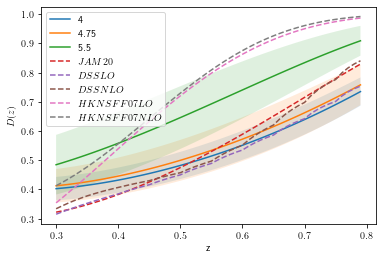

In [46]:
#this one should change with change of fitting func
#def Dz(z_had, params):
#    return params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
#parameters_scipy = [ 3.14617947e-01,  1.03733758e+00,  1.66666667e-01, -8.61444127e-12]
z_had = np.arange(0.3,0.8,0.01)
#plt.plot(z_had,Dz(z_had,inits))
plt.plot(z_had,Dz_param(z_had,parameters[0]),label = '4')
Dz_max_0 = []
for zi in z_had:
    max_i = 0
    for i_0 in np.arange(-param_errs[0][0],param_errs[0][0],0.01):
        #print(i_2)
        for i_1 in np.arange(-param_errs[0][1],param_errs[0][1],0.01):
            max_i = max(max_i,Dz_param(zi,(parameters[0][0]+i_0,parameters[0][1]+i_1,0,0)))
    Dz_max_0.append(max_i)        
plt.fill_between(z_had,2*Dz_param(z_had,parameters[0]) - np.asarray(Dz_max_0),np.asarray(Dz_max_0),alpha = 0.15)


plt.plot(z_had,Dz_param(z_had,parameters[1]),label = '4.75')
Dz_max_1 = []
for zi in z_had:
    max_i = 0
    for i_0 in np.arange(-param_errs[1][0],param_errs[1][0],0.01):
        #print(i_2)
        for i_1 in np.arange(-param_errs[1][1],param_errs[1][1],0.01):
            max_i = max(max_i,Dz_param(zi,(parameters[1][0]+i_0,parameters[1][1]+i_1,0,0)))
    Dz_max_1.append(max_i)        
plt.fill_between(z_had,2*Dz_param(z_had,parameters[1]) - np.asarray(Dz_max_1),np.asarray(Dz_max_1),alpha = 0.15)


plt.plot(z_had,Dz_param(z_had,parameters[2]),label = '5.5')
Dz_max_2 = []
for zi in z_had:
    max_i = 0
    for i_0 in np.arange(-param_errs[2][0],param_errs[2][0],0.01):
        #print(i_2)
        for i_1 in np.arange(-param_errs[2][1],param_errs[2][1],0.01):
            max_i = max(max_i,Dz_param(zi,(parameters[2][0]+i_0,parameters[2][1]+i_1,0,0)))
    Dz_max_2.append(max_i)        
plt.fill_between(z_had,2*Dz_param(z_had,parameters[2]) - np.asarray(Dz_max_2),np.asarray(Dz_max_2),alpha = 0.15)


#plt.plot(z_had,Dz_param(z_had,parameters_scipy),label = 'scipy')

Q = 2
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Deltaz = []
DSS_LO = []
DSS_NLO = []
HKNSFF07_LO = []
HKNSFF07_NLO = []
z_axis = np.arange(0.3,0.8,0.01)
for zi in z_axis:
    dup = JAM20.xfxQ(2,zi,Q)
    dum = JAM20.xfxQ(-2,zi,Q)
    #print(dup,' ',dum)
    JAM20_Deltaz.append(dum/dup)
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,Q*Q)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,Q*Q)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])
    ff = np.zeros(11)
    grad = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,1,ff,grad)
    ff_minus = np.zeros(11)
    grad_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,2,ff_minus,grad_minus)
    duplus = zi*ff[6]
    duminus = zi*ff_minus[6]
    HKNSFF07_LO.append(duminus/duplus)
    ff_NLO = np.zeros(11)
    grad_NLO = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,1,ff_NLO,grad_NLO)
    ff_NLO_minus = np.zeros(11)
    grad_NLO_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,2,ff_NLO_minus,grad_NLO_minus)
    duplus_NLO = zi*ff_NLO[6]
    duminus_NLO = zi*ff_NLO_minus[6]
    HKNSFF07_NLO.append(duminus_NLO/duplus_NLO)

plt.plot(z_axis,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
plt.plot(z_axis,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_LO))/(1+np.asarray(HKNSFF07_LO)),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_NLO))/(1+np.asarray(HKNSFF07_NLO)),linestyle='dashed',label = r'$HKNSFF07 NLO$')





plt.legend()

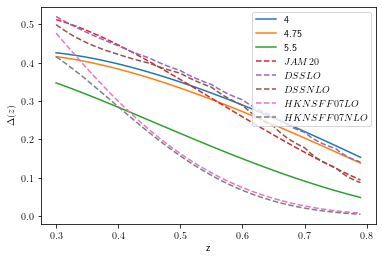

In [47]:
def Deltaz(z_had,params):
    return z_had**params[0]*(1-z_had)**params[1]
#z_had = np.arange(0.3,0.8,0.01)
#plt.plot(z_had,Dz(z_had,inits))
plt.plot(z_axis,Deltaz(z_axis,parameters[0]),label = '4')
plt.plot(z_axis,Deltaz(z_axis,parameters[1]),label = '4.75')
plt.plot(z_axis,Deltaz(z_axis,parameters[2]),label = '5.5')

plt.plot(z_axis,np.asarray(JAM20_Deltaz),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.plot(z_axis,np.asarray(DSS_LO),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,np.asarray(DSS_NLO),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,np.asarray(HKNSFF07_LO),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,np.asarray(HKNSFF07_NLO),linestyle='dashed',label = r'$HKNSFF07 NLO$')
plt.legend()


This is CSV function delta u_v / delta d_v


Text(0, 0.5, '$\\delta d - \\delta u$')

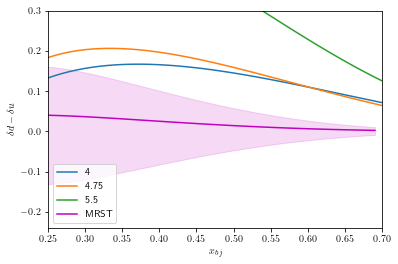

In [48]:
#this one should change with change of fitting func
#def CSVx_param(x,params):
#    return params[len(params)-1]+0*x
xbj = np.arange(0.01,0.99,0.01)

plt.plot(xbj,CSVx_param(xbj,parameters[0]),label = '4')
#for i_err in param_errs[0]:
#for i_err in range(2,len(param_errs[0])):
#    print(param_errs[0][i_err])
    #if()
    #for i_3 in param_errs[0][3]:
param_low = [0,0]
param_high = [0,0]
for i_err in range(0,len(parameters[0])):
    #print(i_err)
    param_low.append(parameters[0][i_err]-param_errs[0][i_err])
    param_high.append(parameters[0][i_err]+param_errs[0][i_err])
#plt.fill_between(xbj,CSVx_param(xbj,param_low),CSVx_param(xbj,param_high),alpha = 0.15)
#plt.fill_between(xbj,CSVx_param(xbj,parameters[0])-CSVx_param(xbj,param_errs[0]),CSVx_param(xbj,parameters[0])+CSVx_param(xbj,param_errs[0]),alpha = 0.15)
plt.plot(xbj,CSVx_param(xbj,parameters[1]),label = '4.75')
param_low = [0,0]
param_high = [0,0]
for i_err in range(0,len(parameters[1])):
    param_low.append(parameters[1][i_err]-param_errs[1][i_err])
    param_high.append(parameters[1][i_err]+param_errs[1][i_err])
#plt.fill_between(xbj,CSVx_param(xbj,param_low),CSVx_param(xbj,param_high),alpha = 0.15)

plt.plot(xbj,CSVx_param(xbj,parameters[2]),label = '5.5')
param_low = [0,0]
param_high = [0,0]
for i_err in range(0,len(parameters[2])):
    param_low.append(parameters[2][i_err]-param_errs[2][i_err])
    param_high.append(parameters[2][i_err]+param_errs[2][i_err])
#plt.fill_between(xbj,CSVx_param(xbj,param_low),CSVx_param(xbj,param_high),alpha = 0.15)

#plt.plot(xbj,CSVx_param(xbj,parameters_scipy),label = 'scipy',color = 'g')



print('This is CSV function delta u_v / delta d_v')
def delta_udv(parameter):
    x = np.arange(0.2,0.7,0.01)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)

x_axis = np.arange(0.2,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")


This is CSV function delta u_v / delta d_v


Text(0, 0.5, '$\\delta d - \\delta u$')

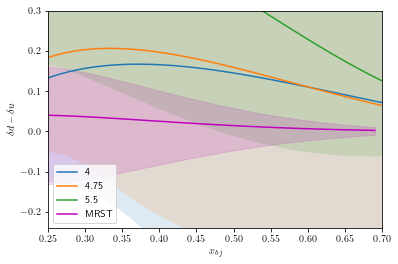

In [17]:
#more correct err band for two parameters
xbj = np.arange(0.1,0.9,0.01)

plt.plot(xbj,CSVx_param(xbj,parameters[0]),label = '4')
CSV_max_1 = []
for xi in xbj:
    max_i = 0
    for i_2 in np.arange(-param_errs[0][2],param_errs[0][2],0.01):
        #print(i_2)
        for i_3 in np.arange(-param_errs[0][2],param_errs[0][3],0.01):
            max_i = max(max_i,CSVx_param(xi,(0,0,parameters[0][2]+i_2,parameters[0][2]+i_3)))
    CSV_max_1.append(max_i)        
plt.fill_between(xbj,2*CSVx_param(xbj,parameters[0]) - np.asarray(CSV_max_1),np.asarray(CSV_max_1),alpha = 0.15)

plt.plot(xbj,CSVx_param(xbj,parameters[1]),label = '4.75')
CSV_max_2 = []
for xi in xbj:
    max_i = 0
    for i_2 in np.arange(-param_errs[1][2],param_errs[1][2],0.01):
        #print(i_2)
        for i_3 in np.arange(-param_errs[1][2],param_errs[1][3],0.01):
            max_i = max(max_i,CSVx_param(xi,(0,0,parameters[1][2]+i_2,parameters[1][3]+i_3)))
    CSV_max_2.append(max_i) 
plt.fill_between(xbj,2*CSVx_param(xbj,parameters[1]) - np.asarray(CSV_max_2),np.asarray(CSV_max_2),alpha = 0.15)

plt.plot(xbj,CSVx_param(xbj,parameters[2]),label = '5.5')
CSV_max_3 = []
for xi in xbj:
    max_i = 0
    for i_2 in np.arange(-param_errs[2][2],param_errs[2][2],0.01):
        #print(i_2)
        for i_3 in np.arange(-param_errs[2][2],param_errs[2][3],0.01):
            max_i = max(max_i,CSVx_param(xi,(0,0,parameters[2][2]+i_2,parameters[2][3]+i_3)))
    CSV_max_3.append(max_i) 
plt.fill_between(xbj,2*CSVx_param(xbj,parameters[2]) - np.asarray(CSV_max_3),np.asarray(CSV_max_3),alpha = 0.15)

#plt.plot(xbj,CSVx_param(xbj,parameters_scipy),label = 'scipy',color = 'g')



print('This is CSV function delta u_v / delta d_v')
def delta_udv(parameter):
    x = np.arange(0.2,0.7,0.01)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)

x_axis = np.arange(0.2,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")



In [18]:
#more correct err band for three parameters
'''
xbj = np.arange(0.1,0.9,0.01)

plt.plot(xbj,CSVx_param(xbj,parameters[0]),label = '4')
CSV_max_1 = []
for xi in xbj:
    max_i = 0
    for i_2 in np.arange(0,param_errs[0][2],0.01):
        #print(i_2)
        for i_3 in np.arange(0,param_errs[0][3],0.01):
            for i_4 in np.arange(0,param_errs[0][4],0.01):
                max_i = max(max_i,CSVx_param(xi,parameters[0])+CSVx_param(xi,(0,0,i_2,i_3,i_4)))
    CSV_max_1.append(max_i)        
plt.fill_between(xbj,2*CSVx_param(xbj,parameters[0]) - np.asarray(CSV_max_1),np.asarray(CSV_max_1),alpha = 0.15)

plt.plot(xbj,CSVx_param(xbj,parameters[1]),label = '4.75')
CSV_max_2 = []
for xi in xbj:
    max_i = 0
    for i_2 in np.arange(0,param_errs[1][2],0.01):
        #print(i_2)
        for i_3 in np.arange(0,param_errs[1][3],0.01):
            for i_4 in np.arange(0,param_errs[0][4],0.01):
                max_i = max(max_i,CSVx_param(xi,parameters[1])+CSVx_param(xi,(0,0,i_2,i_3,i_4)))
    CSV_max_2.append(max_i) 
plt.fill_between(xbj,2*CSVx_param(xbj,parameters[1]) - np.asarray(CSV_max_2),np.asarray(CSV_max_2),alpha = 0.15)

plt.plot(xbj,CSVx_param(xbj,parameters[2]),label = '5.5')
CSV_max_3 = []
for xi in xbj:
    max_i = 0
    for i_2 in np.arange(0,param_errs[2][2],0.01):
        #print(i_2)
        for i_3 in np.arange(0,param_errs[2][3],0.01):
            for i_4 in np.arange(0,param_errs[0][4],0.01):
                max_i = max(max_i,CSVx_param(xi,parameters[2])+CSVx_param(xi,(0,0,i_2,i_3,i_4)))
    CSV_max_3.append(max_i) 
plt.fill_between(xbj,2*CSVx_param(xbj,parameters[2]) - np.asarray(CSV_max_3),np.asarray(CSV_max_3),alpha = 0.15)

#plt.plot(xbj,CSVx_param(xbj,parameters_scipy),label = 'scipy',color = 'g')



print('This is CSV function delta u_v / delta d_v')
def delta_udv(parameter):
    x = np.arange(0.2,0.7,0.01)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)

x_axis = np.arange(0.2,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")

'''


'\nxbj = np.arange(0.1,0.9,0.01)\n\nplt.plot(xbj,CSVx_param(xbj,parameters[0]),label = \'4\')\nCSV_max_1 = []\nfor xi in xbj:\n    max_i = 0\n    for i_2 in np.arange(0,param_errs[0][2],0.01):\n        #print(i_2)\n        for i_3 in np.arange(0,param_errs[0][3],0.01):\n            for i_4 in np.arange(0,param_errs[0][4],0.01):\n                max_i = max(max_i,CSVx_param(xi,parameters[0])+CSVx_param(xi,(0,0,i_2,i_3,i_4)))\n    CSV_max_1.append(max_i)        \nplt.fill_between(xbj,2*CSVx_param(xbj,parameters[0]) - np.asarray(CSV_max_1),np.asarray(CSV_max_1),alpha = 0.15)\n\nplt.plot(xbj,CSVx_param(xbj,parameters[1]),label = \'4.75\')\nCSV_max_2 = []\nfor xi in xbj:\n    max_i = 0\n    for i_2 in np.arange(0,param_errs[1][2],0.01):\n        #print(i_2)\n        for i_3 in np.arange(0,param_errs[1][3],0.01):\n            for i_4 in np.arange(0,param_errs[0][4],0.01):\n                max_i = max(max_i,CSVx_param(xi,parameters[1])+CSVx_param(xi,(0,0,i_2,i_3,i_4)))\n    CSV_max_2.append(m

This is CSV function delta u_v / delta d_v


Text(0, 0.5, '$\\delta d - \\delta u$')

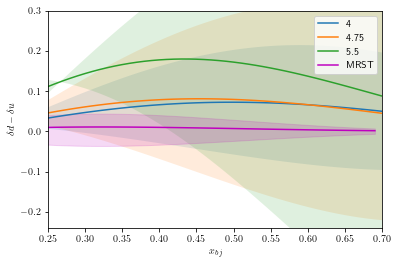

In [19]:
#this one should change with change of fitting func
#def CSVx_param(x,params):
#    return params[len(params)-1]+0*x
xbj = np.arange(0.1,0.9,0.01)

plt.plot(xbj,xbj*CSVx_param(xbj,parameters[0]),label = '4')

plt.fill_between(xbj,xbj*CSVx_param(xbj,parameters[0])-xbj*CSVx_param(xbj,param_errs[0]),xbj*CSVx_param(xbj,parameters[0])+xbj*CSVx_param(xbj,param_errs[0]),alpha = 0.15)
plt.plot(xbj,xbj*CSVx_param(xbj,parameters[1]),label = '4.75')
plt.fill_between(xbj,xbj*CSVx_param(xbj,parameters[1])-xbj*CSVx_param(xbj,param_errs[1]),xbj*CSVx_param(xbj,parameters[1])+xbj*CSVx_param(xbj,param_errs[1]),alpha = 0.15)
plt.plot(xbj,xbj*CSVx_param(xbj,parameters[2]),label = '5.5')
plt.fill_between(xbj,xbj*CSVx_param(xbj,parameters[2])-xbj*CSVx_param(xbj,param_errs[2]),xbj*CSVx_param(xbj,parameters[2])+xbj*CSVx_param(xbj,param_errs[2]),alpha = 0.15)

print('This is CSV function delta u_v / delta d_v')
def delta_udv(parameter):
    x = np.arange(0.2,0.7,0.01)
    return parameter*(1-x)**4*x**0.5*(x-0.0909)

x_axis = np.arange(0.2,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")


In [32]:
import scipy.integrate as integrate
print(integrate.quad(CSVx_param,0,1,parameters[0]))
print(integrate.quad(CSVx_param,0,1,parameters[1]))
print(integrate.quad(CSVx_param,0,1,parameters[2]))


(1.8010220275075083e-13, 6.790537724760216e-09)
(6.956138675571499e-13, 3.666710829407705e-10)
(4.546328691404739e-13, 4.971850629020665e-10)


In [21]:
a = parameters[0][3]
b = parameters[0][2]
c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
print(c)

0.4179458082415214
